In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [103]:
data = pd.read_csv('Customer_Behaviour.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [104]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [106]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [107]:
X = data.drop(columns = 'Purchased', axis=1)
y = data['Purchased']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#Decision Tree

In [109]:
dt_model = DecisionTreeClassifier()
dt_model

DecisionTreeClassifier()

In [110]:
# Hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

In [111]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             verbose=2)

In [112]:
# Print the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20}


In [113]:
y_pred = best_model.predict(X_test)

In [114]:
# Model evaluation
dt_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", dt_accuracy*100)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 87.5
Confusion Matrix:
 [[68  5]
 [10 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        73
           1       0.88      0.79      0.83        47

    accuracy                           0.88       120
   macro avg       0.88      0.86      0.87       120
weighted avg       0.88      0.88      0.87       120



#Naive Bayes

In [115]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [116]:
y_pred = nb_model.predict(X_test)

In [117]:
# Model evaluation
nb_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", nb_accuracy*100)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 88.33333333333333
Confusion Matrix:
 [[73  0]
 [14 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        73
           1       1.00      0.70      0.82        47

    accuracy                           0.88       120
   macro avg       0.92      0.85      0.87       120
weighted avg       0.90      0.88      0.88       120



#SVM

In [118]:
svm = SVC(kernel = 'linear', C = 1.0)
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [119]:
y_pred = svm.predict(X_test)

In [120]:
#Model evaluation
svm_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", svm_accuracy*100)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 71.66666666666667
Confusion Matrix:
 [[70  3]
 [31 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.96      0.80        73
           1       0.84      0.34      0.48        47

    accuracy                           0.72       120
   macro avg       0.77      0.65      0.64       120
weighted avg       0.75      0.72      0.68       120



#Visualizations to plot the accuracies

In [121]:
# Collect the accuracies
model_names = ['Decision Tree', 'Naive Bayes', 'SVM']
accuracies = [dt_accuracy, nb_accuracy, svm_accuracy]

Plot 1 - Bar plot

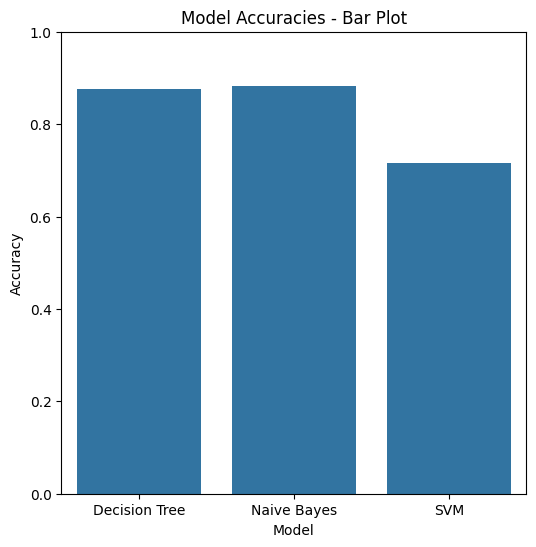

In [122]:
plt.figure(figsize=(6, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Accuracies - Bar Plot')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

Plot 2 - Line plot

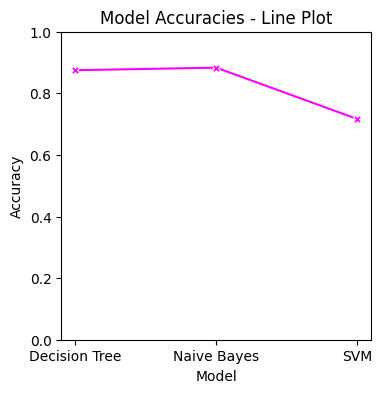

In [123]:
plt.figure(figsize=(4, 4))
sns.lineplot(x=model_names, y=accuracies, marker='X', color = 'magenta')
plt.title('Model Accuracies - Line Plot')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

Plot 3 - Scatter plot

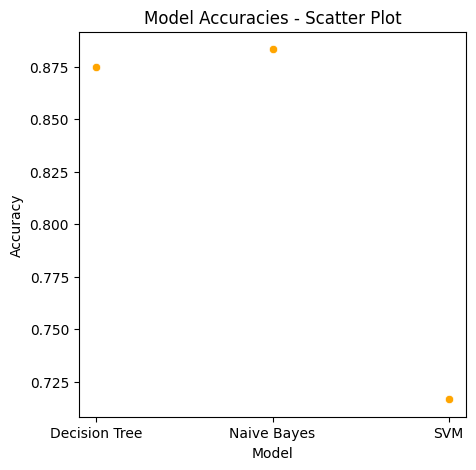

In [124]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=model_names, y=accuracies, color = 'orange')
plt.title('Model Accuracies - Scatter Plot')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

#Simple Linear Regression

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [139]:
salary_data = pd.read_csv("Salary_dataset.csv")
salary_data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [140]:
salary_data.drop(columns = "Unnamed: 0", inplace = True)

In [141]:
salary_data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [145]:
X = salary_data[['YearsExperience']]
y = salary_data['Salary']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [147]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [148]:
y_pred = linear_regressor.predict(X_test)

In [150]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 37784662.46621308
Root Mean Squared Error: 6146.9230079945755
R^2 Score: 0.9414466227178215


#Handling missing values in Titanic dataset

In [125]:
titanic_data = pd.read_csv("titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [127]:
titanic_data['Age'].dtype

dtype('float64')

In [128]:
mean_age = titanic_data['Age'].mean
titanic_data['Age'] = titanic_data['Age'].fillna(mean_age)

In [129]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [130]:
titanic_data['Cabin'].dtype

dtype('O')

In [131]:
mode_cabin = titanic_data['Cabin'].mode
titanic_data['Cabin'] = titanic_data['Cabin'].fillna(mode_cabin)

In [132]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [133]:
titanic_data['Embarked'].dtype

dtype('O')

In [136]:
mode_embarked = titanic_data['Embarked'].mode
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(mode_embarked)

In [137]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64